# Step 1: Finding and Downloading a Dataset


https://www.kaggle.com/gsutters/economic-freedom

In [89]:
import pandas as pd
import numpy as np
import time
# Found Data Set
# Generally This dataset is about Econmic Freedoms in the world
df = pd.read_csv('efw_cc.csv')
dataframe_copy = df.copy()

In [90]:
df.isna().sum()

year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                       723
rank                                   723
quartile                               723
1a_government_consumption              589
1b_transfers                           960
1c_gov_enterprises                     646
1d_top_marg_tax_rate                  1047
1_size_government                      647
2a_judicial_independence              1553
2b_impartial_courts                   1179
2c_protection_property_rights         1129
2d_military_interference              1186
2e_integrity_legal_system             1153
2f_legal_enforcement_contracts        1361
2g_restrictions_sale_real_property    1384
2h_reliability_police                 2071
2i_business_costs_crime               2071
2j_gender_adjustment                    66
2_property_rights                      755
3a_money_growth                        644
3b_std_infl

### Make my continous variable, categorical

In [91]:
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] > 5, 'Econ_Freedom_label'] = '1' # Economic Freedom is above 5
dataframe_copy.loc[dataframe_copy['ECONOMIC FREEDOM'] <= 5, 'Econ_Freedom_label'] = '0'# Economic Freedom is between 0 and 5

In [92]:
# I dropped all the rows that are NA in the Predicting categories label (Econ_Freedom_label)
dataframe_copy2 = dataframe_copy.dropna(subset = ["Econ_Freedom_label"], inplace=False)
print("\nOrginal Shape of DataFrame", df.shape, "\nShape of dataframe after dropping values that are NA after Categorizing predictor:", dataframe_copy2.shape)


Orginal Shape of DataFrame (3726, 36) 
Shape of dataframe after dropping values that are NA after Categorizing predictor: (3003, 37)


In [95]:
X = dataframe_copy2.drop(['ECONOMIC FREEDOM', 'Econ_Freedom_label'], axis = 1)
y = dataframe_copy2.Econ_Freedom_label

# Step 2: Dividing into a training and testing set

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("\nTrain Value Spread\n", y_train.value_counts(),
"\nTest Value Spread\n", y_test.value_counts())


Train Value Spread
 1    2143
0     259
Name: Econ_Freedom_label, dtype: int64 
Test Value Spread
 1    538
0     63
Name: Econ_Freedom_label, dtype: int64


# Explor your Training Set

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 1364 to 884
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                2402 non-null   int64  
 1   ISO_code                            2402 non-null   object 
 2   countries                           2402 non-null   object 
 3   rank                                2402 non-null   float64
 4   quartile                            2402 non-null   float64
 5   1a_government_consumption           2395 non-null   float64
 6   1b_transfers                        2179 non-null   float64
 7   1c_gov_enterprises                  2331 non-null   float64
 8   1d_top_marg_tax_rate                2129 non-null   float64
 9   1_size_government                   2394 non-null   float64
 10  2a_judicial_independence            1727 non-null   float64
 11  2b_impartial_courts                 2042 

In [98]:
X_train.describe()

year         rank     quartile  1a_government_consumption  \
count  2402.000000  2402.000000  2402.000000                2395.000000   
mean   2003.863447    68.905912     2.517902                   5.898042   
std      10.868668    41.560646     1.123326                   2.226662   
min    1970.000000     1.000000     1.000000                   0.000000   
25%    2001.000000    33.000000     2.000000                   4.499237   
50%    2007.000000    67.000000     3.000000                   6.102941   
75%    2012.000000   103.000000     4.000000                   7.581411   
max    2016.000000   162.000000     4.000000                  10.000000   

       1b_transfers  1c_gov_enterprises  1d_top_marg_tax_rate  \
count   2179.000000         2331.000000           2129.000000   
mean       7.703330            5.870013              5.848990   
std        2.104638            3.208734              2.633441   
min        0.844687            0.000000              0.000000   
25%        6.242507            4.000000              4.000000   
50%        8.447262            7.000000              6.000000   
75%        9.483777            8.000000              8.000000   
max       10.000000           10.000000             10.000000   

       1_size_government  2a_judicial_independence  2b_impartial_courts  ...  \
count        2394.000000               1727.000000          2042.000000  ...   
mean            6.282827                  4.976102             4.645748  ...   
std             1.413701                  2.251745             1.767465  ...   
min             1.190589                  0.000000             0.000000  ...   
25%             5.272855                  3.203184             3.333333  ...   
50%             6.345566                  4.652498             4.296596  ...   
75%             7.297097                  6.775268             5.788051  ...   
max             9.904651                  9.816667             9.686000  ...   

       3_sound_money   4a_tariffs  4b_regulatory_trade_barriers  \
count    2400.000000  2388.000000                   1894.000000   
mean        7.683954     7.102229                      6.292763   
std         1.810057     1.765842                      1.731468   
min         0.000000     0.000000                      0.000000   
25%         6.663735     6.236889                      5.377680   
50%         7.990735     7.486667                      6.558651   
75%         9.245650     8.336492                      7.499088   
max         9.922187    10.000000                      9.833333   

       4c_black_market  4d_control_movement_capital_ppl      4_trade  \
count      2397.000000                      2402.000000  2391.000000   
mean          9.269521                         4.501650     6.741679   
std           2.227253                         2.625935     1.673766   
min           0.000000                         0.000000     0.000000   
25%          10.000000                         2.274172     5.978988   
50%          10.000000                         4.833413     7.011854   
75%          10.000000                         6.558020     7.902182   
max          10.000000                        10.000000    10.000000   

       5a_credit_market_reg  5b_labor_market_reg  5c_business_reg  \
count           2399.000000          2056.000000      1861.000000   
mean               7.845887             6.186871         6.176875   
std                1.925312             1.510374         1.273600   
min                0.000000             2.099009         2.009841   
25%                6.888593             5.079479         5.369350   
50%                8.333333             6.221540         6.150259   
75%                9.333333             7.363822         6.970793   
max               10.000000             9.725000         9.503739   

       5_regulation  
count   2376.000000  
mean       6.656335  
std        1.223928  
min        1.578483  
25%        5.898591  
50%        6.767542  
75

In [99]:
X_train.isnull().sum()

year                                     0
ISO_code                                 0
countries                                0
rank                                     0
quartile                                 0
1a_government_consumption                7
1b_transfers                           223
1c_gov_enterprises                      71
1d_top_marg_tax_rate                   273
1_size_government                        8
2a_judicial_independence               675
2b_impartial_courts                    360
2c_protection_property_rights          341
2d_military_interference               365
2e_integrity_legal_system              351
2f_legal_enforcement_contracts         516
2g_restrictions_sale_real_property     535
2h_reliability_police                 1083
2i_business_costs_crime               1083
2j_gender_adjustment                     0
2_property_rights                       39
3a_money_growth                         12
3b_std_inflation                         3
3c_inflatio

In [100]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [101]:
X_train.isnull().sum()

year                                  0
ISO_code                              0
countries                             0
rank                                  0
quartile                              0
1a_government_consumption             0
1b_transfers                          0
1c_gov_enterprises                    0
1d_top_marg_tax_rate                  0
1_size_government                     0
2a_judicial_independence              0
2b_impartial_courts                   0
2c_protection_property_rights         0
2d_military_interference              0
2e_integrity_legal_system             0
2f_legal_enforcement_contracts        0
2g_restrictions_sale_real_property    0
2h_reliability_police                 0
2i_business_costs_crime               0
2j_gender_adjustment                  0
2_property_rights                     0
3a_money_growth                       0
3b_std_inflation                      0
3c_inflation                          0
3d_freedom_own_foreign_currency       0


### look at correlations between Econmic Freedom! in X_train

In [102]:
dataframe_correlation = pd.concat([dataframe_copy['ECONOMIC FREEDOM'],X_train], axis = 1)

In [103]:
corr_matrix = dataframe_correlation.corr()
corr_matrix_specific = np.abs(corr_matrix['ECONOMIC FREEDOM'])
top_correlations = corr_matrix_specific.sort_values(ascending = False)
print(top_correlations, top_correlations.shape)

ECONOMIC FREEDOM                      1.000000
4_trade                               0.862859
3_sound_money                         0.818117
quartile                              0.815810
5_regulation                          0.796792
4d_control_movement_capital_ppl       0.751505
5a_credit_market_reg                  0.731033
2_property_rights                     0.722187
rank                                  0.717717
3d_freedom_own_foreign_currency       0.635225
4a_tariffs                            0.611017
4c_black_market                       0.592664
2c_protection_property_rights         0.565104
1c_gov_enterprises                    0.558316
3c_inflation                          0.548940
3b_std_inflation                      0.545813
5c_business_reg                       0.534655
2d_military_interference              0.525476
2e_integrity_legal_system             0.513959
4b_regulatory_trade_barriers          0.513539
3a_money_growth                       0.472993
2b_impartial_

In [104]:
chosen_correlations = top_correlations['4_trade':'4b_regulatory_trade_barriers']

In [105]:
correlation_index = chosen_correlations.index
X_train_corr = X_train.loc[:,correlation_index]
X_test_corr = X_test.loc[:,correlation_index]

# Step 5: Visualize the data in your trianing set

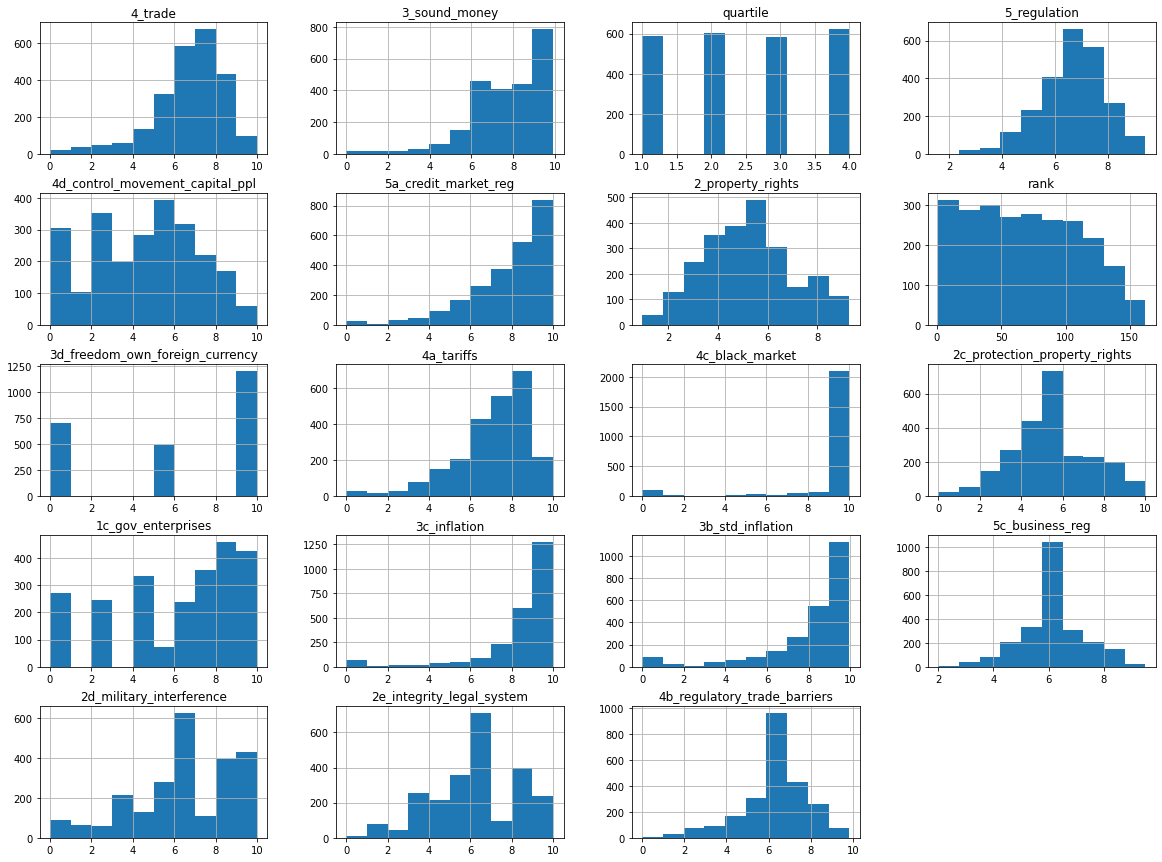

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train_corr.hist(bins=10, figsize = (20,15))
plt.show()

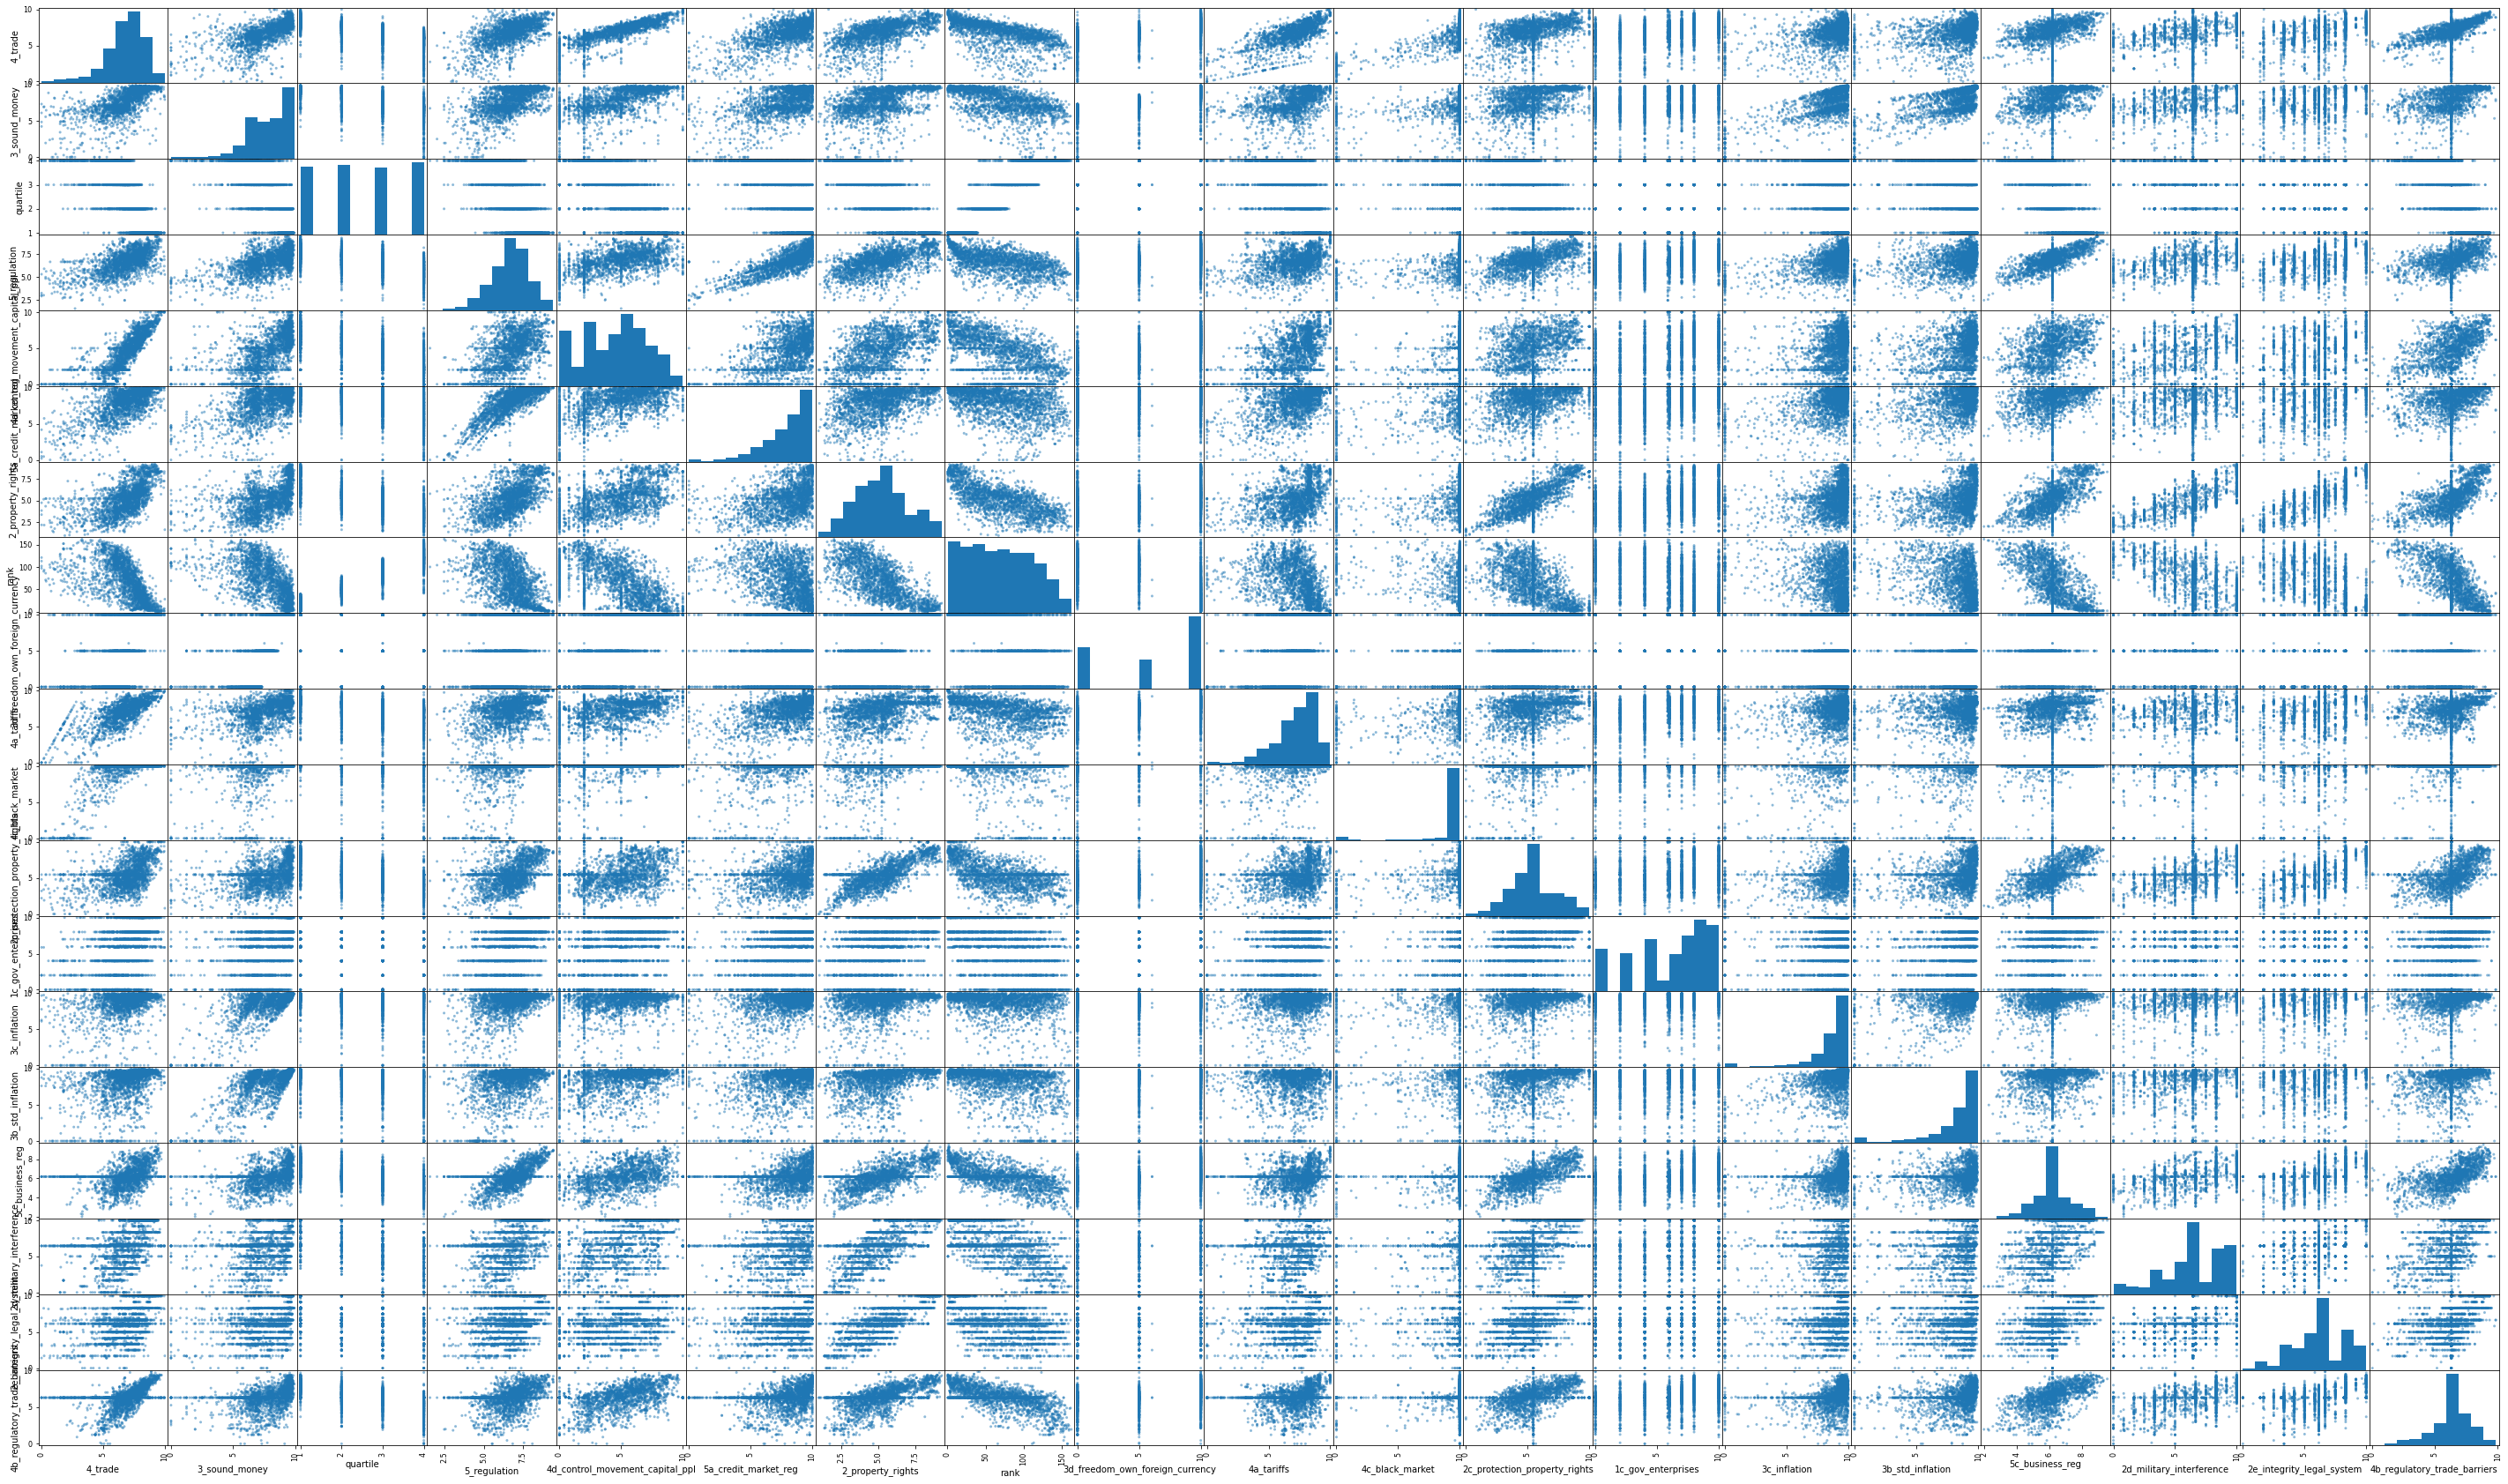

In [107]:
%matplotlib inline
from pandas.plotting import scatter_matrix
scatter_matrix(X_train_corr, figsize = (50,30));

# Step 5: Apply transformations 

In [108]:
X_train_corr.var().sort_values(ascending = False)

rank                               1727.287270
3d_freedom_own_foreign_currency      18.812366
1c_gov_enterprises                    9.991509
4d_control_movement_capital_ppl       6.895537
2d_military_interference              6.584282
3b_std_inflation                      5.038319
4c_black_market                       4.950324
2e_integrity_legal_system             4.733100
3c_inflation                          3.870045
5a_credit_market_reg                  3.702194
2c_protection_property_rights         3.534031
3_sound_money                         3.273579
2_property_rights                     3.176429
4a_tariffs                            3.100016
4_trade                               2.788659
4b_regulatory_trade_barriers          2.363674
5_regulation                          1.481779
quartile                              1.261862
5c_business_reg                       1.256570
dtype: float64

# Step 6: Apply Transformations to your data

In [109]:
attributes = ['4_trade','4d_control_movement_capital_ppl']

In [110]:
trade = X_train_corr['4_trade'].values.reshape(-1,1)
control_movement = X_train_corr['4d_control_movement_capital_ppl'].values.reshape(-1,1)

### Normal

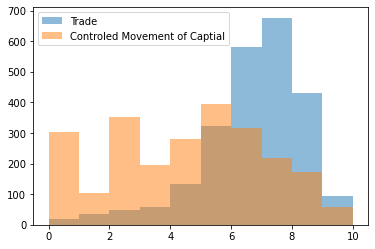

In [111]:
plt.hist(trade, label='Trade', alpha=0.5, bins = 10)
plt.hist(control_movement, label='Controled Movement of Captial',alpha=0.5, bins = 10)
plt.legend()

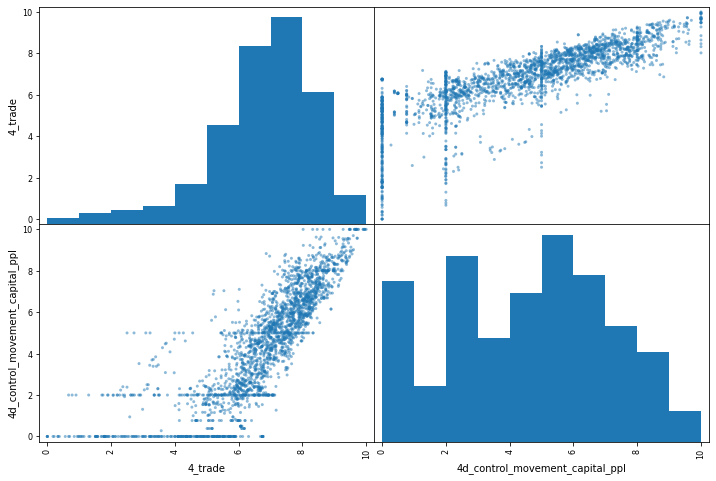

In [112]:
scatter_matrix(X_train_corr[attributes], figsize=(12, 8));

## Squared 

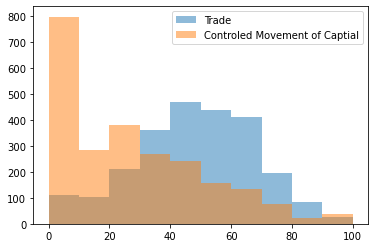

In [113]:
plt.hist(trade**2, label='Trade', alpha=0.5, bins = 10)
plt.hist(control_movement**2, label='Controled Movement of Captial',alpha=0.5, bins = 10)
plt.legend()

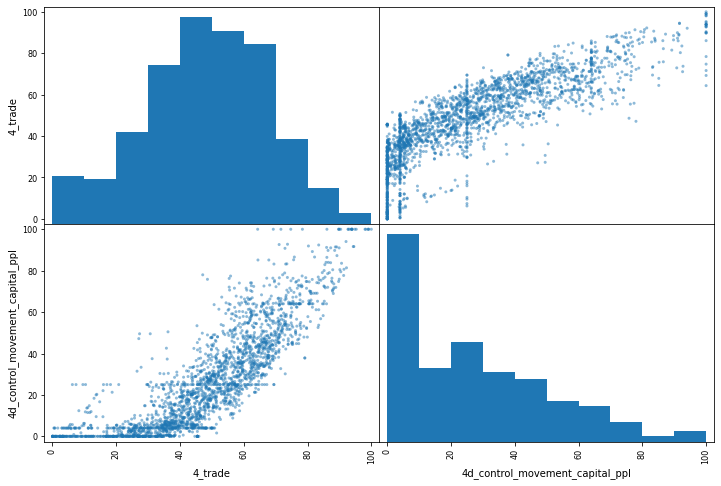

In [114]:
scatter_matrix(X_train_corr[attributes]**2, figsize=(12, 8));

## Cubed

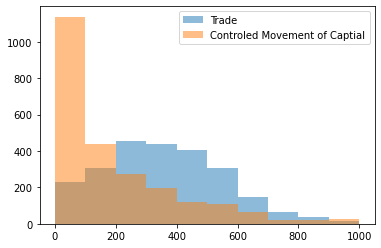

In [115]:
plt.hist(trade**3, label='Trade', alpha=0.5, bins = 10)
plt.hist(control_movement**3, label='Controled Movement of Captial',alpha=0.5, bins = 10)
plt.legend()

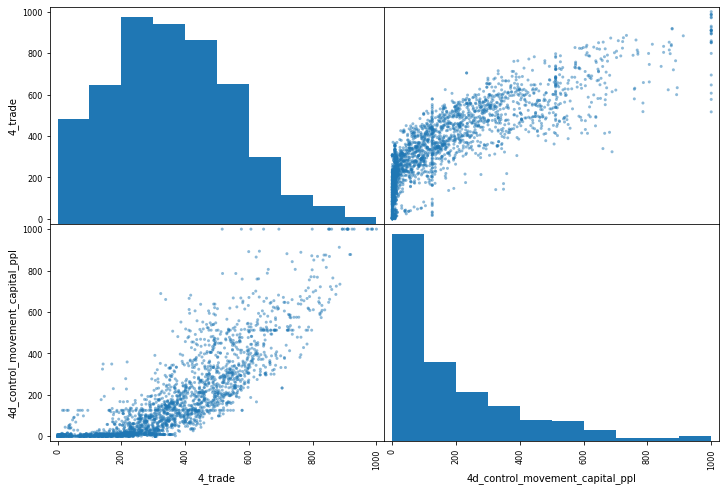

In [116]:
scatter_matrix(X_train_corr[attributes]**3, figsize=(12, 8));

## Exponential

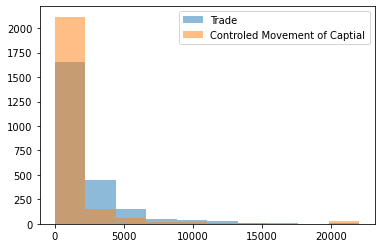

In [117]:
plt.hist(np.exp(trade), label='Trade', alpha=0.5, bins = 10)
plt.hist(np.exp(control_movement), label='Controled Movement of Captial',alpha=0.5, bins = 10)
plt.legend()

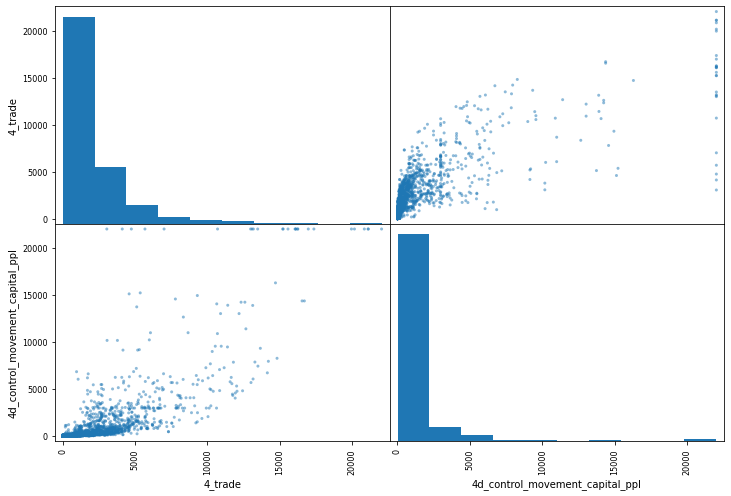

In [118]:
scatter_matrix(np.exp(X_train_corr[attributes]), figsize=(12, 8));

## Logarithmic

#### Skipped Log b/c some of the vlaues that are being looked at are 0, because of this Log's of these numbers produce an infident range preventing an actual output. 

In [ ]:
plt.hist(np.log(trade), label='Trade', alpha=0.5, bins = 10)
plt.hist(np.log(control_movement), label='Controled Movement of Captial',alpha=0.5, bins = 10)
plt.legend()

In [ ]:
scatter_matrix(np.log(X_train_corr[attributes]), figsize=(12, 8));

In [120]:
X_train_corr

4_trade  3_sound_money  quartile  5_regulation  \
1364  4.977802       7.878745       4.0      5.936632   
2146  8.074509       9.113782       2.0      6.879979   
227   7.148336       7.170466       2.0      8.032681   
747   6.899011       7.595864       2.0      7.303742   
2860  9.272535       9.698783       1.0      6.960935   
...        ...            ...       ...           ...   
1754  7.879371       9.488931       1.0      7.104706   
1133  4.907822       1.972000       4.0      4.602499   
1173  8.234264       9.417517       1.0      7.363334   
1360  7.861466       9.245079       2.0      7.479880   
884   7.109093       9.876129       1.0      7.911756   

      4d_control_movement_capital_ppl  5a_credit_market_reg  \
1364                         0.000000              6.087282   
2146                         6.660256              8.741828   
227                          4.219390              8.333333   
747                          4.293550              8.719309   
2860                         9.551250              9.002328   
...                               ...                   ...   
1754                         5.601429             10.000000   
1133                         2.458793              4.789439   
1173                         6.385780              9.342813   
1360                         5.956007              9.478589   
884                          5.492614              8.099446   

      2_property_rights   rank  3d_freedom_own_foreign_currency  4a_tariffs  \
1364           4.757031  110.0                             10.0    4.215556   
2146           5.999433   61.0                             10.0    8.304444   
227            8.450045   59.0                              0.0    7.264000   
747            5.525099   70.0                             10.0    9.164444   
2860           9.111000    9.0                             10.0    8.655556   
...                 ...    ...                              ...         ...   
1754           6.829839   28.0                             10.0    8.219556   
1133           3.826300  151.0                              0.0    3.671111   
1173           6.594133   11.0                             10.0    8.345556   
1360           6.296249   52.0                             10.0    8.031556   
884            7.300382   30.0                             10.0    6.269733   

      4c_black_market  2c_protection_property_rights  1c_gov_enterprises  \
1364             10.0                       5.462387                 6.0   
2146             10.0                       4.833333                 6.0   
227              10.0                       8.048760                 8.0   
747              10.0                       4.261424                10.0   
2860             10.0                       7.455000                10.0   
...               ...                            ...                 ...   
1754             10.0                       7.567842                10.0   
1133             10.0                       2.243496                 7.0   
1173             10.0                       7.390354                10.0   
1360             10.0                       6.038295                10.0   
884              10.0                       7.983432                 8.0   

      3c_inflation  3b_std_inflation  5c_business_reg  \
1364      4.890031          8.447987         6.938974   
2146      9.979699          9.390042         4.699142   
227       9.673743          9.395091         8.060435   
747       7.004000          6.537764         6.160874   
2860      9.674000          9.852000         7.787178   
...            ...               ...              ...   
1754      9.296836          9.926103         5.953673   
1133      7.888000          0.000000         3.964576   
1173      9.925184          9.190970         6.444116   
1360      8.786650          9.498601         5.882862   
884       9.944000          9.707609         7.310386   

      2d_military_

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report



knn = KNeighborsClassifier()
knn.fit(X_train_corr, y_train)
prediction = knn.predict(X_test_corr)

print('\nRegular Data')

train_accuracy = np.mean(prediction == y_test)
print("\nTraining Accuracy: ", train_accuracy)

train_size = X_train_corr.shape[0]
train_no_correct = train_size  * train_accuracy

print ("\nTrain - No. Of Correct Predictions", train_no_correct, "/", train_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))



Regular Data

Training Accuracy:  0.9750415973377704

Train - No. Of Correct Predictions 2342.0499168053243 / 2402

Test Confusion Matrix:
[[ 54   9]
 [  6 532]]

Test Precision = 0.974625
Test Recall = 0.975042
Test F1 Score = 0.974772

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        63
           1       0.98      0.99      0.99       538

    accuracy                           0.98       601
   macro avg       0.94      0.92      0.93       601
weighted avg       0.97      0.98      0.97       601



### Test Project, seeing if Standardizing in pre split's effects the actual outcome compared to after the splits. 

In [128]:
X = dataframe_copy2.drop(['ECONOMIC FREEDOM', 'Econ_Freedom_label'], axis = 1)
y = dataframe_copy2.Econ_Freedom_label

X = X.fillna(X.mean())

In [129]:
from sklearn.preprocessing import StandardScaler
X = X.loc[:,correlation_index]
scaler = StandardScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)  

#scaled_X.columns = X.columns

print(X_scaled.shape, y.shape)

(3003, 19) (3003,)


In [130]:
print("Shape of X:", X_scaled.shape, "\nShape of Y:", y.shape)
X_STrain, X_STest, y_STrain, y_STest = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)
print("Train Value Spread\n", y_STrain.value_counts(),
"\nTest Value Spread\n", y_STest.value_counts())

Shape of X: (3003, 19) 
Shape of Y: (3003,)
Train Value Spread
 1    2143
0     259
Name: Econ_Freedom_label, dtype: int64 
Test Value Spread
 1    538
0     63
Name: Econ_Freedom_label, dtype: int64


In [132]:
knn = KNeighborsClassifier()
knn.fit(X_STrain, y_STrain)
prediction = knn.predict(X_STest)

print('\nScaled Data Pre Split')

train_accuracy = np.mean(prediction == y_STest)
print("\nTraining Accuracy: ", train_accuracy)

train_size = X_STrain.shape[0]
train_no_correct = train_size  * train_accuracy

print ("\nTrain - No. Of Correct Predictions", train_no_correct, "/", train_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_STest, prediction))


precision_test = precision_score(y_STest, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_STest, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_STest, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_STest, prediction))




Non-Scaled Data

Training Accuracy:  0.9767054908485857

Train - No. Of Correct Predictions 2346.0465890183027 / 2402

Test Confusion Matrix:
[[ 55   8]
 [  6 532]]

Test Precision = 0.976427
Test Recall = 0.976705
Test F1 Score = 0.976539

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.99      0.99      0.99       538

    accuracy                           0.98       601
   macro avg       0.94      0.93      0.94       601
weighted avg       0.98      0.98      0.98       601



### Scaled Data With Scaling Post Split 

In [137]:
X_train_corr, X_test_corr, y_train, y_test

### Standardizing through scaler 

scaler = StandardScaler() 
scaler.fit(X_train_corr)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_corr),columns = X_train_corr.columns)  
X_test_scaled = pd.DataFrame(scaler.transform(X_test_corr),columns = X_test_corr.columns)

print("\nShape of Training set:", X_train_scaled.shape, '\nShape of Testing Set:', X_test_scaled.shape)


Shape of Training set: (2402, 19) 
Shape of Testing Set: (601, 19)


In [138]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_corr)

print('\nScaled Data Pre Split')

train_accuracy = np.mean(prediction == y_test)
print("\nTraining Accuracy: ", train_accuracy)

train_size = X_train_scaled.shape[0]
train_no_correct = train_size  * train_accuracy

print ("\nTrain - No. Of Correct Predictions", train_no_correct, "/", train_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))




Scaled Data Pre Split

Training Accuracy:  0.9001663893510815

Train - No. Of Correct Predictions 2162.1996672212977 / 2402

Test Confusion Matrix:
[[  4  59]
 [  1 537]]

Test Precision = 0.890419
Test Recall = 0.900166
Test F1 Score = 0.860143

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.06      0.12        63
           1       0.90      1.00      0.95       538

    accuracy                           0.90       601
   macro avg       0.85      0.53      0.53       601
weighted avg       0.89      0.90      0.86       601



### Running the training on everything before train test split produced a better result compeared to after the split. But this could be attributed to the lack of averaging and that these values were trained using the training scale and becasue of that it will naturally throw off the testing data becasue although it should generally follow its shape, it doesn't normally follow the same values. 